In [464]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [465]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# 分類数設定

In [466]:
NUM_CLASSES = 3

# 学習データ読み込み

In [467]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [468]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [469]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [470]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [471]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_42 (Dropout)        (None, 42)                0         
                                                                 
 dense_63 (Dense)            (None, 20)                860       
                                                                 
 dropout_43 (Dropout)        (None, 20)                0         
                                                                 
 dense_64 (Dense)            (None, 10)                210       
                                                                 
 dense_65 (Dense)            (None, 3)                 33        
                                                                 
Total params: 1,103
Trainable params: 1,103
Non-trainable params: 0
_________________________________________________________________


In [472]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='model/keypoint_classifier/keypoint_classifier.hdf5', verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [473]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [474]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/21 [>.............................] - ETA: 6s - loss: 1.2030 - accuracy: 0.2734
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
21/21 [==============================] - 0s 8ms/step - loss: 1.1405 - accuracy: 0.3735 - val_loss: 1.0585 - val_accuracy: 0.4346
Epoch 2/1000
 1/21 [>.............................] - ETA: 0s - loss: 1.0931 - accuracy: 0.4531
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
21/21 [==============================] - 0s 4ms/step - loss: 1.0739 - accuracy: 0.4471 - val_loss: 1.0231 - val_accuracy: 0.4767
Epoch 3/1000
 1/21 [>.............................] - ETA: 0s - loss: 1.0369 - accuracy: 0.4922
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
21/21 [==============================] - 0s 4ms/step - loss: 1.0332 - accuracy: 0.4623 - val_loss: 0.9960 - val_accuracy: 0.5108
Epoch 4/1000
 1/21 [>.............................] - ETA: 0s - loss: 0.9895 - accuracy: 0.5469
E

 1/21 [>.............................] - ETA: 0s - loss: 0.7673 - accuracy: 0.6172
Epoch 28: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
21/21 [==============================] - 0s 3ms/step - loss: 0.7884 - accuracy: 0.5654 - val_loss: 0.7580 - val_accuracy: 0.6359
Epoch 29/1000
 1/21 [>.............................] - ETA: 0s - loss: 0.8323 - accuracy: 0.5391
Epoch 29: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
21/21 [==============================] - 0s 3ms/step - loss: 0.7930 - accuracy: 0.5446 - val_loss: 0.7599 - val_accuracy: 0.5859
Epoch 30/1000
 1/21 [>.............................] - ETA: 0s - loss: 0.7331 - accuracy: 0.5938
Epoch 30: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
21/21 [==============================] - 0s 3ms/step - loss: 0.7902 - accuracy: 0.5529 - val_loss: 0.7550 - val_accuracy: 0.6405
Epoch 31/1000
 1/21 [>.............................] - ETA: 0s - loss: 0.8050 - accuracy: 0.5469
Epoch 31

 1/21 [>.............................] - ETA: 0s - loss: 0.7675 - accuracy: 0.6016
Epoch 55: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
21/21 [==============================] - 0s 3ms/step - loss: 0.7537 - accuracy: 0.5772 - val_loss: 0.7057 - val_accuracy: 0.6382
Epoch 56/1000
 1/21 [>.............................] - ETA: 0s - loss: 0.7563 - accuracy: 0.5625
Epoch 56: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
21/21 [==============================] - 0s 3ms/step - loss: 0.7507 - accuracy: 0.5832 - val_loss: 0.7009 - val_accuracy: 0.6485
Epoch 57/1000
 1/21 [>.............................] - ETA: 0s - loss: 0.7550 - accuracy: 0.6172
Epoch 57: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
21/21 [==============================] - 0s 3ms/step - loss: 0.7432 - accuracy: 0.5791 - val_loss: 0.7017 - val_accuracy: 0.6428
Epoch 58/1000
 1/21 [>.............................] - ETA: 0s - loss: 0.7815 - accuracy: 0.5703
Epoch 58

 1/21 [>.............................] - ETA: 0s - loss: 0.8198 - accuracy: 0.5000
Epoch 82: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
21/21 [==============================] - 0s 3ms/step - loss: 0.7231 - accuracy: 0.6151 - val_loss: 0.6672 - val_accuracy: 0.6951
Epoch 83/1000
 1/21 [>.............................] - ETA: 0s - loss: 0.7084 - accuracy: 0.6484
Epoch 83: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
21/21 [==============================] - 0s 3ms/step - loss: 0.7249 - accuracy: 0.6052 - val_loss: 0.6620 - val_accuracy: 0.7156
Epoch 84/1000
 1/21 [>.............................] - ETA: 0s - loss: 0.6712 - accuracy: 0.6406
Epoch 84: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
21/21 [==============================] - 0s 3ms/step - loss: 0.7184 - accuracy: 0.6003 - val_loss: 0.6612 - val_accuracy: 0.7156
Epoch 85/1000
 1/21 [>.............................] - ETA: 0s - loss: 0.7397 - accuracy: 0.5312
Epoch 85

 1/21 [>.............................] - ETA: 0s - loss: 0.6886 - accuracy: 0.6641
Epoch 109: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
21/21 [==============================] - 0s 3ms/step - loss: 0.6977 - accuracy: 0.6325 - val_loss: 0.6356 - val_accuracy: 0.7543
Epoch 110/1000
 1/21 [>.............................] - ETA: 0s - loss: 0.6582 - accuracy: 0.5703
Epoch 110: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
21/21 [==============================] - 0s 3ms/step - loss: 0.7001 - accuracy: 0.6185 - val_loss: 0.6319 - val_accuracy: 0.7645
Epoch 111/1000
 1/21 [>.............................] - ETA: 0s - loss: 0.6789 - accuracy: 0.6484
Epoch 111: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
21/21 [==============================] - 0s 3ms/step - loss: 0.7099 - accuracy: 0.6064 - val_loss: 0.6432 - val_accuracy: 0.7440
Epoch 112/1000
 1/21 [>.............................] - ETA: 0s - loss: 0.6890 - accuracy: 0.6406
Ep

Epoch 136/1000
 1/21 [>.............................] - ETA: 0s - loss: 0.7391 - accuracy: 0.5781
Epoch 136: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
21/21 [==============================] - 0s 3ms/step - loss: 0.6910 - accuracy: 0.6246 - val_loss: 0.6336 - val_accuracy: 0.7543
Epoch 137/1000
 1/21 [>.............................] - ETA: 0s - loss: 0.6925 - accuracy: 0.6328
Epoch 137: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
21/21 [==============================] - 0s 3ms/step - loss: 0.6934 - accuracy: 0.6177 - val_loss: 0.6276 - val_accuracy: 0.7440
Epoch 138/1000
 1/21 [>.............................] - ETA: 0s - loss: 0.6540 - accuracy: 0.7188
Epoch 138: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
21/21 [==============================] - 0s 3ms/step - loss: 0.6896 - accuracy: 0.6314 - val_loss: 0.6248 - val_accuracy: 0.7531
Epoch 139/1000
 1/21 [>.............................] - ETA: 0s - loss: 0.6835 - accu

Epoch 163/1000
 1/21 [>.............................] - ETA: 0s - loss: 0.6346 - accuracy: 0.6094
Epoch 163: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
21/21 [==============================] - 0s 3ms/step - loss: 0.6729 - accuracy: 0.6196 - val_loss: 0.6187 - val_accuracy: 0.7440
Epoch 164/1000
 1/21 [>.............................] - ETA: 0s - loss: 0.6656 - accuracy: 0.5938
Epoch 164: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
21/21 [==============================] - 0s 3ms/step - loss: 0.6845 - accuracy: 0.6132 - val_loss: 0.6229 - val_accuracy: 0.7543
Epoch 165/1000
 1/21 [>.............................] - ETA: 0s - loss: 0.7340 - accuracy: 0.5625
Epoch 165: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
21/21 [==============================] - 0s 3ms/step - loss: 0.6910 - accuracy: 0.6295 - val_loss: 0.6272 - val_accuracy: 0.7554
Epoch 166/1000
 1/21 [>.............................] - ETA: 0s - loss: 0.6525 - accu

Epoch 190/1000
 1/21 [>.............................] - ETA: 0s - loss: 0.7531 - accuracy: 0.5859
Epoch 190: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
21/21 [==============================] - 0s 3ms/step - loss: 0.6916 - accuracy: 0.6177 - val_loss: 0.6194 - val_accuracy: 0.7429
Epoch 191/1000
 1/21 [>.............................] - ETA: 0s - loss: 0.6381 - accuracy: 0.7031
Epoch 191: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
21/21 [==============================] - 0s 3ms/step - loss: 0.6756 - accuracy: 0.6488 - val_loss: 0.6172 - val_accuracy: 0.7565
Epoch 192/1000
 1/21 [>.............................] - ETA: 0s - loss: 0.6281 - accuracy: 0.7266
Epoch 192: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
21/21 [==============================] - 0s 3ms/step - loss: 0.6725 - accuracy: 0.6318 - val_loss: 0.6112 - val_accuracy: 0.7531
Epoch 193/1000
 1/21 [>.............................] - ETA: 0s - loss: 0.6574 - accu

In [475]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

7/7 [==============================] - 0s 1ms/step - loss: 0.6211 - accuracy: 0.7406


In [476]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [477]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 38ms/step
[0.5363351  0.46299127 0.00067354]
0


# 混同行列

28/28 [==============================] - 0s 741us/step


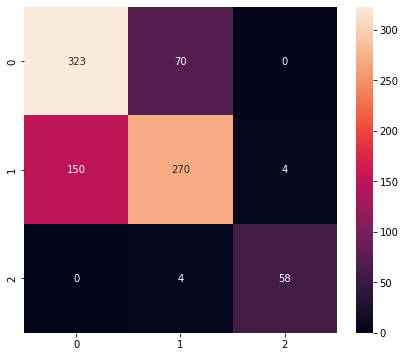

Classification Report
              precision    recall  f1-score   support

           0       0.68      0.82      0.75       393
           1       0.78      0.64      0.70       424
           2       0.94      0.94      0.94        62

    accuracy                           0.74       879
   macro avg       0.80      0.80      0.79       879
weighted avg       0.75      0.74      0.74       879



In [478]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [479]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [480]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /var/folders/wc/syg7_ssj4ldfwg1dgdct0scw0000gn/T/tmpcn2p34ol/assets


INFO:tensorflow:Assets written to: /var/folders/wc/syg7_ssj4ldfwg1dgdct0scw0000gn/T/tmpcn2p34ol/assets
2024-03-19 01:39:46.915334: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2024-03-19 01:39:46.915354: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2024-03-19 01:39:46.915472: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: /var/folders/wc/syg7_ssj4ldfwg1dgdct0scw0000gn/T/tmpcn2p34ol
2024-03-19 01:39:46.916954: I tensorflow/cc/saved_model/reader.cc:81] Reading meta graph with tags { serve }
2024-03-19 01:39:46.916966: I tensorflow/cc/saved_model/reader.cc:122] Reading SavedModel debug info (if present) from: /var/folders/wc/syg7_ssj4ldfwg1dgdct0scw0000gn/T/tmpcn2p34ol
2024-03-19 01:39:46.922497: I tensorflow/cc/saved_model/loader.cc:228] Restoring SavedModel bundle.
2024-03-19 01:39:46.957034: I tensorflow/cc/saved_model/loader.cc:212] Running initialization

6524

# 推論テスト

In [481]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [482]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [483]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [484]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 44 µs, sys: 9 µs, total: 53 µs
Wall time: 59.8 µs


In [485]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[0.5363352  0.46299127 0.00067354]
0
